## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Importing Data

In [2]:
data = pd.read_csv('train.csv', encoding='ISO-8859-1')

## Importing General Insights of the Data

In [3]:
# First few rows
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Last Few rows
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [5]:
# Shape of the Data
data.shape

(103904, 25)

In [6]:
# Columns present in the Data
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Data Cleaning and Preparation

In [7]:
# Checking Null values
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
# Impute with mean
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(), inplace=True)

# Re-checking Null values
data.isnull().sum()

C:\Users\deban\AppData\Local\Temp\ipykernel_84828\4049654052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(), inplace=True)


Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
# Checking Duplicate Values
data.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

### Statistical Analysis

In [10]:
# Checking Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [11]:
# Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


### Data Visualizations

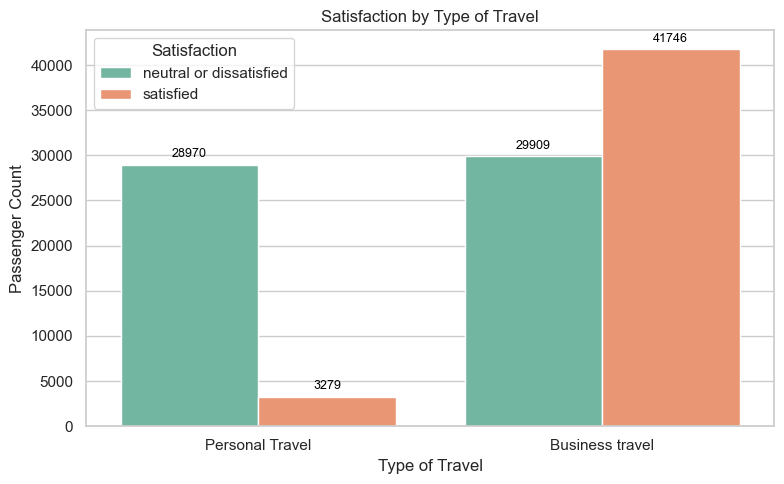

In [12]:
# Set theme
sns.set(style='whitegrid')

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Type of Travel', hue='satisfaction', palette='Set2')

# Titles and labels
plt.title('Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Passenger Count')
plt.legend(title='Satisfaction')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\deban\AppData\Local\Temp\ipykernel_84828\599801555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='satisfaction', y='Age', palette='coolwarm')


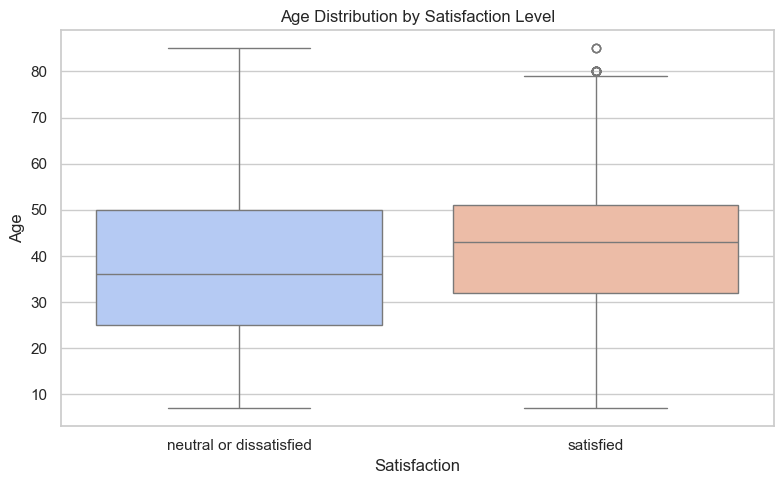

In [13]:
# Box Plot: Age Distribution vs Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='satisfaction', y='Age', palette='coolwarm')
plt.title('Age Distribution by Satisfaction Level')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

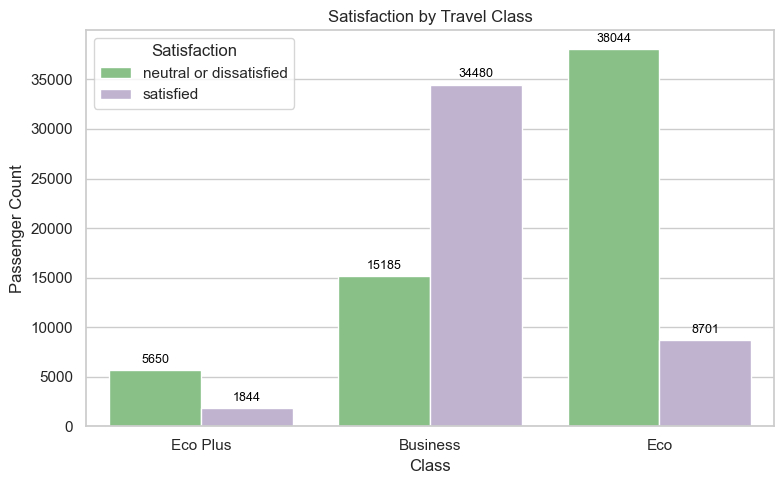

In [14]:
#  Count Plot: Class vs Satisfaction
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Class', hue='satisfaction', palette='Accent')

# Title and labels
plt.title('Satisfaction by Travel Class')
plt.xlabel('Class')
plt.ylabel('Passenger Count')
plt.legend(title='Satisfaction')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

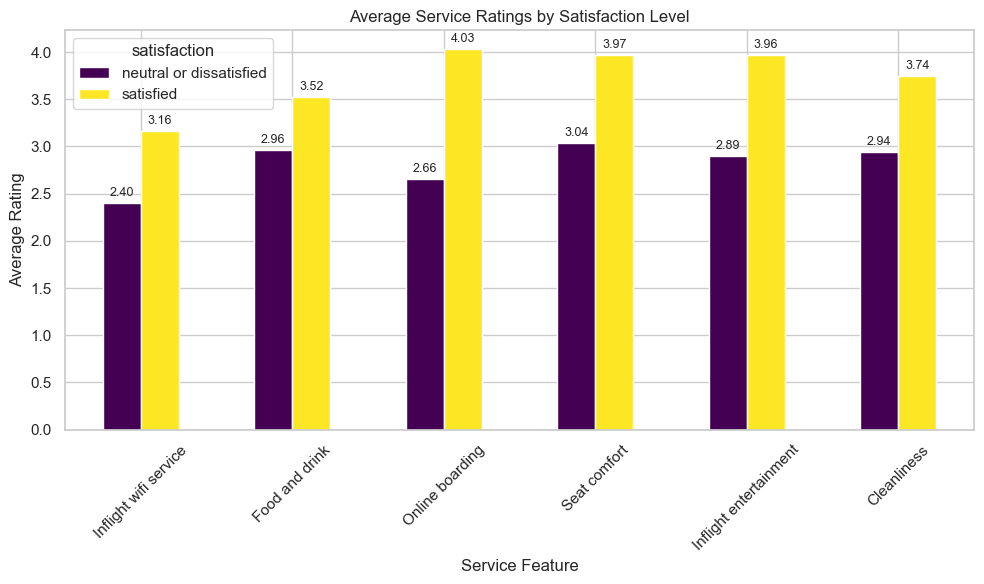

In [15]:
# Bar Plot: Average Service Ratings by Satisfaction
# Compute average service ratings grouped by satisfaction
service_cols = ['Inflight wifi service', 'Food and drink', 'Online boarding',
                'Seat comfort', 'Inflight entertainment', 'Cleanliness']

avg_service = data.groupby('satisfaction')[service_cols].mean().T

# Plot
ax = avg_service.plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Set titles and labels
plt.title('Average Service Ratings by Satisfaction Level')
plt.ylabel('Average Rating')
plt.xlabel('Service Feature')
plt.xticks(rotation=45)

# Add average rating labels on each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

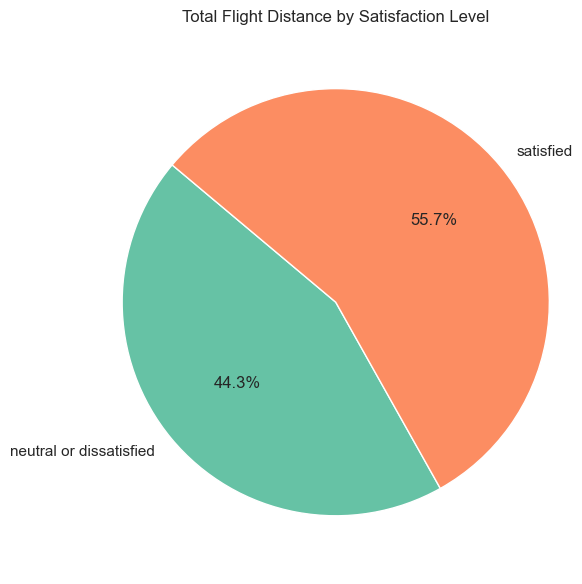

In [16]:
# Pie Plot: Flight Distance vs Satisfaction
# Group by satisfaction and sum flight distances
flight_distance_sum = data.groupby('satisfaction')['Flight Distance'].sum()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(flight_distance_sum, labels=flight_distance_sum.index,
        autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Total Flight Distance by Satisfaction Level')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()

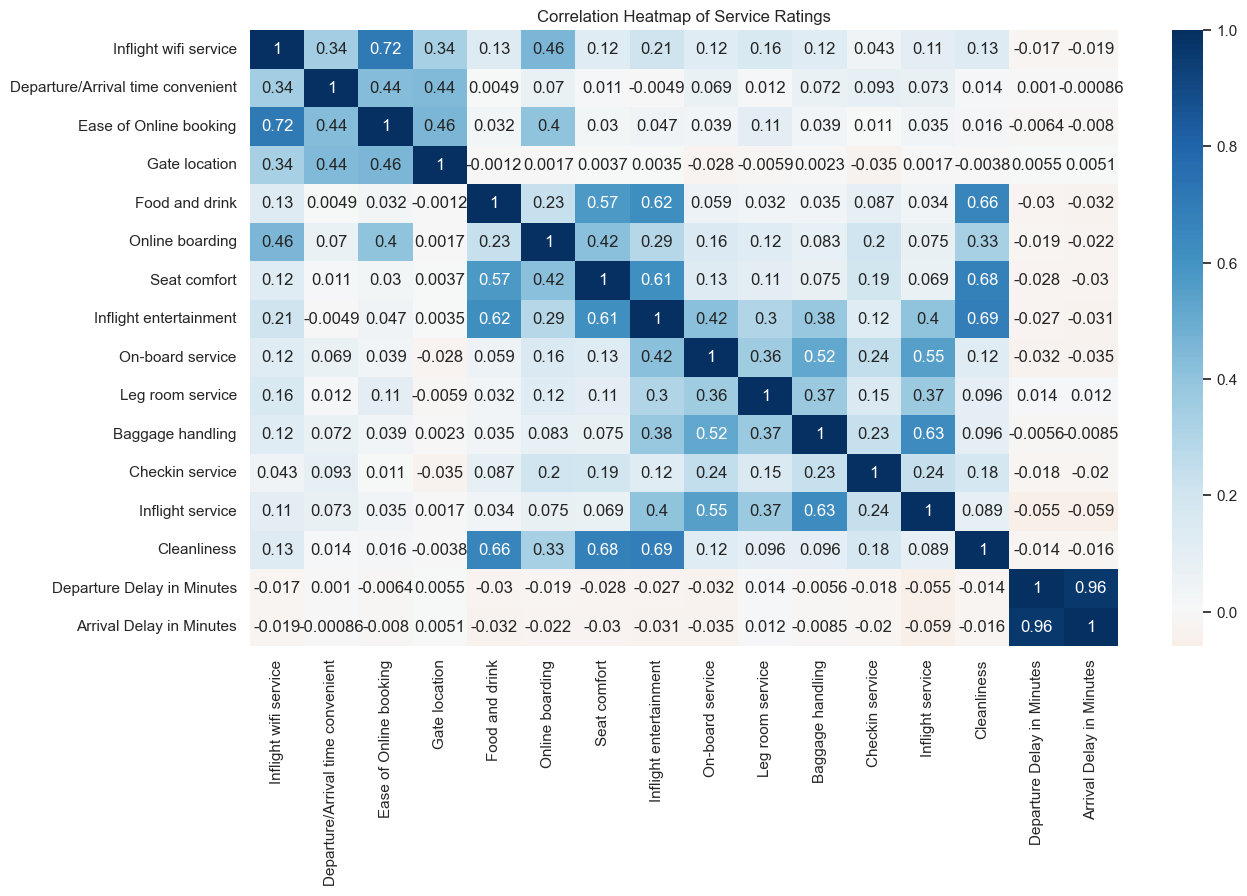

In [17]:
# Heatmap: Correlation between satisfaction and other service columns
# List of service-related columns
service_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness'
]

plt.figure(figsize=(14, 8))
correlation = data[service_columns + ['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()
sns.heatmap(correlation, annot=True, cmap='RdBu', center=0)
plt.title('Correlation Heatmap of Service Ratings')
plt.show()

## Feature Selection

In [18]:
# Compute correlation matrix for all numerical columns
corr_matrix = data.select_dtypes(include=[np.number]).corr().abs()

# Create upper triangle matrix of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#  Identify features with correlation > 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

#  Drop those features from original dataset
data_reduced = data.drop(columns=to_drop)

#  Display dropped and retained columns
print("Dropped due to multicollinearity (correlation > 0.8):")
print(to_drop)

print("\n Remaining columns:")
print(data_reduced.columns.tolist())

Dropped due to multicollinearity (correlation > 0.8):
['Arrival Delay in Minutes']

 Remaining columns:
['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'satisfaction']


## Data Preprocessing

In [19]:
# Select categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Show encoded columns
print("✅ Label Encoded Categorical Columns:")
print(cat_cols)

✅ Label Encoded Categorical Columns:
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [20]:
# Drop the unnecessary index/helper columns
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)

## Data Splitting

In [21]:
# Features (X) and Target (y)
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

In [22]:
# Split the dataset into training, validation, and test sets (60% training, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
# Feature Scaling (Standardization) 
scaler = StandardScaler()

# Fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets using the same scaler
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the datasets
print(f'Training set: {X_train_scaled.shape}, Validation set: {X_valid_scaled.shape}, Test set: {X_test_scaled.shape}')

Training set: (62342, 22), Validation set: (20781, 22), Test set: (20781, 22)


## Machine Learning Model Evaluation

### 1. AdaBoost Classifier

In [24]:
# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

In [25]:
# Train the model on the training set
ada_classifier.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=42)

In [26]:
# Make predictions on the validation set
y_valid_pred_ada = ada_classifier.predict(X_valid_scaled)

In [27]:
# Evaluate accuracy
accuracy_ada = accuracy_score(y_valid, y_valid_pred_ada)
print(f'Accuracy: {accuracy_ada * 100:.2f}%')

Accuracy: 91.36%


In [28]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred_ada))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11711
           1       0.91      0.89      0.90      9070

    accuracy                           0.91     20781
   macro avg       0.91      0.91      0.91     20781
weighted avg       0.91      0.91      0.91     20781



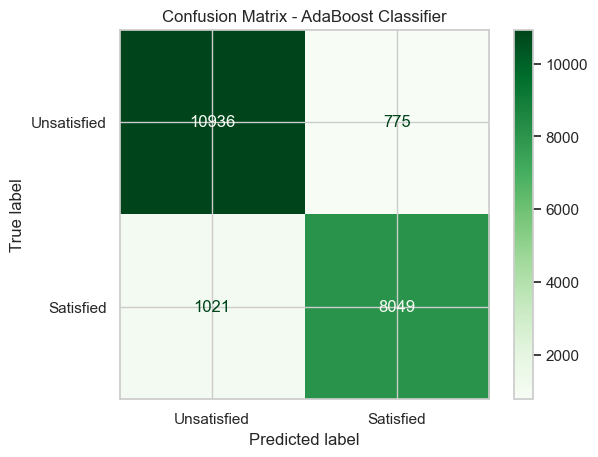

In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred_ada)

# Visualizing the Confusion Matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=['Unsatisfied', 'Satisfied']).plot(cmap='Greens')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()

In [30]:
# Evaluating model based on loss function 
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error

# Calculate the log loss for the validation set
y_valid_proba = ada_classifier.predict_proba(X_valid_scaled)
log_loss_value = log_loss(y_valid, y_valid_proba)
print(f'Log Loss: {log_loss_value:.4f}')

# Calculate the predicted probabilities for the validation set
y_valid_proba = ada_classifier.predict_proba(X_valid_scaled)

# Calculate the Mean Squared Error (MSE) for the predicted probabilities
mse = mean_squared_error(y_valid, y_valid_proba[:, 1])

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Log Loss: 0.5115
Root Mean Squared Error (RMSE): 0.4022


### 2. XGBoost Classifier

In [31]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, random_state=42)

In [32]:
# Train the model on the training set
xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
# Make predictions on the validation set
y_valid_pred_xgb = xgb_classifier.predict(X_valid_scaled)

In [34]:
# Evaluate accuracy
accuracy_xgb = accuracy_score(y_valid, y_valid_pred_xgb)
print(f'Accuracy: {accuracy_xgb * 100:.2f}%')

Accuracy: 96.25%


In [35]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11711
           1       0.97      0.94      0.96      9070

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



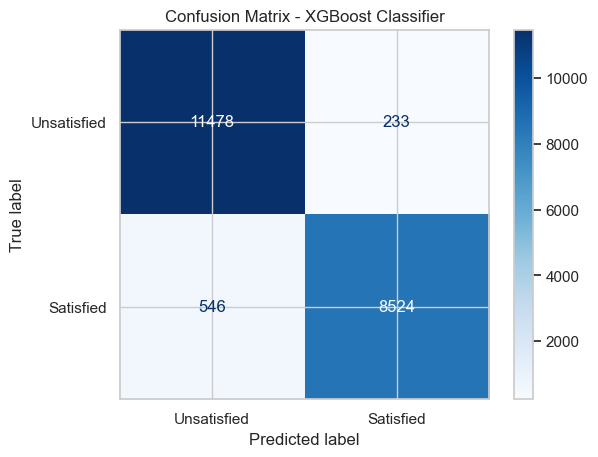

In [36]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_valid, y_valid_pred_xgb)

# Visualizing the Confusion Matrix
ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=['Unsatisfied', 'Satisfied']).plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

In [37]:
# Evaluating model based on loss function 
# Calculate the log loss for the validation set
y_valid_proba_xgb = xgb_classifier.predict_proba(X_valid_scaled)
log_loss_value_xgb = log_loss(y_valid, y_valid_proba_xgb)
print(f'Log Loss: {log_loss_value_xgb:.4f}')

# Calculate the Mean Squared Error (MSE) for the predicted probabilities
mse_xgb = mean_squared_error(y_valid, y_valid_proba_xgb[:, 1])

# Calculate the Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.4f}')

Log Loss: 0.0877
Root Mean Squared Error (RMSE): 0.1639


## 3. Bagging Classifier

In [38]:
# Instantiate the Bagging Classifier
bagging_clf = BaggingClassifier(random_state=42)

In [39]:
# Train the Bagging Classifier
bagging_clf.fit(X_train_scaled, y_train)

BaggingClassifier(random_state=42)

In [40]:
# Predict on the test set
y_pred_bagg = bagging_clf.predict(X_valid_scaled)

In [41]:
# Calculate accuracy
accuracy_bagg = accuracy_score(y_valid, y_pred_bagg) * 100
formatted_accuracy = "{:.3f}".format(accuracy_bagg)
print("Accuracy:", formatted_accuracy, "%")

Accuracy: 95.664 %


In [42]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred_bagg))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11711
           1       0.97      0.93      0.95      9070

    accuracy                           0.96     20781
   macro avg       0.96      0.95      0.96     20781
weighted avg       0.96      0.96      0.96     20781



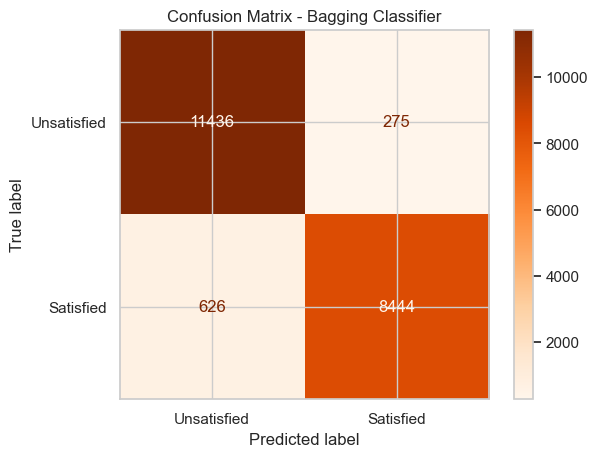

In [43]:
# Confusion Matrix
conf_matrix_bagg = confusion_matrix(y_valid, y_pred_bagg)

# Visualizing the Confusion Matrix
ConfusionMatrixDisplay(conf_matrix_bagg, display_labels=['Unsatisfied', 'Satisfied']).plot(cmap='Oranges')
plt.title('Confusion Matrix - Bagging Classifier')
plt.show()

In [44]:
# Evaluating model based on loss function 
# Calculate the log loss for the validation set
y_valid_proba_bagg = bagging_clf.predict_proba(X_valid_scaled)
log_loss_value_bagg = log_loss(y_valid, y_pred_bagg)
print(f'Log Loss: {log_loss_value_bagg:.4f}')

# Calculate the Mean Squared Error (MSE) for the predicted probabilities
mse_bagg = mean_squared_error(y_valid, y_valid_proba_bagg[:, 1])

# Calculate the Root Mean Squared Error (RMSE)
rmse_bagg = np.sqrt(mse_bagg)
print(f'Root Mean Squared Error (RMSE): {rmse_bagg:.4f}')

Log Loss: 1.5627
Root Mean Squared Error (RMSE): 0.1792


## 4. Decision Tree Classifier

In [45]:
# Instantiate the Decision Tree Classifier
decision_tree_clf = DecisionTreeClassifier(random_state=42)

In [46]:
# Train the Decision Tree Classifier
decision_tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# Predict on the test set
y_pred_decision_tree = decision_tree_clf.predict(X_valid_scaled)

In [48]:
# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_valid, y_pred_decision_tree) * 100
formatted_accuracy_decision_tree = "{:.3f}".format(accuracy_decision_tree)
print("Accuracy:", formatted_accuracy_decision_tree, "%")

Accuracy: 94.461 %


In [49]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred_decision_tree))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11711
           1       0.94      0.94      0.94      9070

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



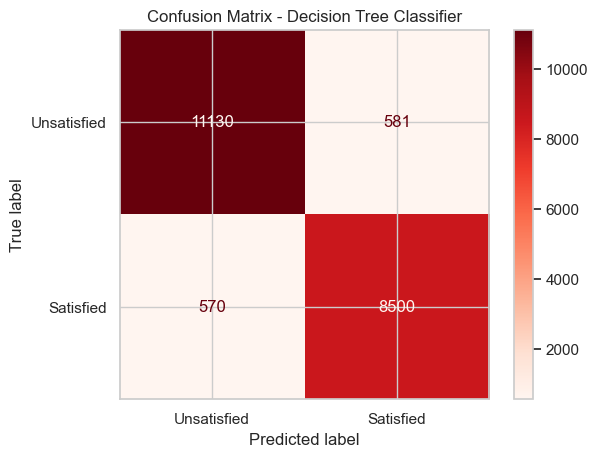

In [50]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_valid, y_pred_decision_tree)

# Visualizing the Confusion Matrix
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=['Unsatisfied', 'Satisfied']).plot(cmap='Reds')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [51]:
# Evaluating model based on loss function 
# Calculate the log loss for the validation set
y_valid_proba_dt = bagging_clf.predict_proba(X_valid_scaled)
log_loss_value_dt = log_loss(y_valid, y_pred_decision_tree)
print(f'Log Loss: {log_loss_value_dt:.4f}')

# Calculate the Mean Squared Error (MSE) for the predicted probabilities
mse_dt = mean_squared_error(y_valid, y_valid_proba_dt[:, 1])

# Calculate the Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)
print(f'Root Mean Squared Error (RMSE): {rmse_dt:.4f}')

Log Loss: 1.9964
Root Mean Squared Error (RMSE): 0.1792


## Model Comparison

In [55]:
# Create a DataFrame to hold the summary of the models
summary_df = pd.DataFrame({
    'Model': ['AdaBoost Classifier', 'XGBoost Classifier', 'Bagging Classifier', 'Decision Tree Classifier'],
    'Accuracy (%)': [accuracy_ada * 100, accuracy_xgb * 100, accuracy_bagg, accuracy_decision_tree],
    'Log Loss': [log_loss_value, log_loss_value_xgb, log_loss_value_bagg, log_loss_value_dt],
    'RMSE': [rmse, rmse_xgb, rmse_bagg, rmse_dt]
})

# Round Accuracy (%) to 2 decimal places for display
summary_df['Accuracy (%)'] = summary_df['Accuracy (%)'].round(2)

# Display the updated summary table
print(summary_df)

# Determine the best performing model based on highest Accuracy
best_row = summary_df.loc[summary_df['Accuracy (%)'].idxmax()]
best_model = best_row['Model']
best_accuracy = best_row['Accuracy (%)']
best_log_loss = best_row['Log Loss']
best_rmse = best_row['RMSE']

# Print the formatted conclusion
print(f"\nBased on accuracy and loss function metrics, the best performing model is: **{best_model}**")
print(f"Accuracy: {best_accuracy:.2f}% | Log Loss: {best_log_loss:.4f} | RMSE: {best_rmse:.4f}")

                      Model  Accuracy (%)  Log Loss      RMSE
0       AdaBoost Classifier         91.36  0.511538  0.402238
1        XGBoost Classifier         96.25  0.087742  0.163887
2        Bagging Classifier         95.66  1.562742  0.179239
3  Decision Tree Classifier         94.46  1.996355  0.179239

Based on accuracy and loss function metrics, the best performing model is: **XGBoost Classifier**
Accuracy: 96.25% | Log Loss: 0.0877 | RMSE: 0.1639


In [53]:
def predict_satisfaction_ui(model, encoder=None, scaler=None):
    print("\n🛫 Welcome to the Airline Passenger Satisfaction Predictor! 🧳\n")
    print("Please enter the following passenger information:")

    try:
        gender = input("Gender (Male/Female): ").strip().title()
        customer_type = input("Customer Type (Loyal Customer/Disloyal Customer): ").strip().title()
        age = int(input("Age: "))
        travel_type = input("Type of Travel (Business travel/Personal Travel): ").strip().title()
        class_type = input("Class (Business/Eco/Eco Plus): ").strip().title()
        flight_distance = int(input("Flight Distance (in km): "))
        inflight_wifi_service = int(input("Inflight Wifi Service (0-5): "))
        departure_arrival_time_convenient = int(input("Departure/Arrival Time Convenient (0-5): "))
        ease_of_online_booking = int(input("Ease of Online Booking (0-5): "))
        gate_location = int(input("Gate Location (0-5): "))
        food_and_drink = int(input("Food and Drink (0-5): "))
        online_boarding = int(input("Online Boarding (0-5): "))
        seat_comfort = int(input("Seat Comfort (0-5): "))
        inflight_entertainment = int(input("Inflight Entertainment (0-5): "))
        on_board_service = int(input("On-board Service (0-5): "))
        leg_room_service = int(input("Leg Room Service (0-5): "))
        baggage_handling = int(input("Baggage Handling (0-5): "))
        checkin_service = int(input("Checkin Service (0-5): "))
        inflight_service = int(input("Inflight Service (0-5): "))
        cleanliness = int(input("Cleanliness (0-5): "))
        departure_delay = int(input("Departure Delay in Minutes: "))
        arrival_delay = int(input("Arrival Delay in Minutes: "))

        # Create a DataFrame from input
        input_data = pd.DataFrame([{
            'Gender': gender,
            'Customer Type': customer_type,
            'Age': age,
            'Type of Travel': travel_type,
            'Class': class_type,
            'Flight Distance': flight_distance,
            'Inflight wifi service': inflight_wifi_service,
            'Departure/Arrival time convenient': departure_arrival_time_convenient,
            'Ease of Online booking': ease_of_online_booking,
            'Gate location': gate_location,
            'Food and drink': food_and_drink,
            'Online boarding': online_boarding,
            'Seat comfort': seat_comfort,
            'Inflight entertainment': inflight_entertainment,
            'On-board service': on_board_service,
            'Leg room service': leg_room_service,
            'Baggage handling': baggage_handling,
            'Checkin service': checkin_service,
            'Inflight service': inflight_service,
            'Cleanliness': cleanliness,
            'Departure Delay in Minutes': departure_delay,
            'Arrival Delay in Minutes': arrival_delay
        }])

        # Apply encoding/scaling if needed
        # Replace this with your actual pipeline logic
        if encoder:
            input_data = encoder.transform(input_data)
        if scaler:
            input_data = scaler.transform(input_data)

        # Predict satisfaction
        prediction = model.predict(input_data)
        result = 'Satisfied 😊' if prediction[0] == 1 else 'Not Satisfied 😞'
        print(f"\n🎯 Prediction: The passenger is likely to be **{result}**.")
    
    except Exception as e:
        print(f"❌ Error: {e}\nPlease enter valid data.")
